# 1 Introduction

## An Overview of Statistical Learning

統計学習とは、データを理解するためのツールの膨大なセットを指します。  
これらのツールは、監視ありまたは監視なしに分類できます。  
大まかに言うと、教師あり統計学習には、1つ以上の入力に基づいて出力を予測または推定するための統計モデルの構築が含まれます。  
この種の問題は、ビジネス、医学、天体物理学、公共政策など、さまざまな分野で発生します。  
教師なし統計学習では、入力はありますが、教師付き出力はありません。  
それにもかかわらず、そのようなデータから関係と構造を学ぶことができます。  
統計学習のいくつかの応用例を示すために、この本で検討されている3つの実際のデータセットについて簡単に説明します。

### Waga Data

このアプリケーション（本書全体で賃金データセットと呼びます）では、米国の大西洋地域の男性グループの賃金に関連するいくつかの要因を調べます。  特に、従業員の年齢と学歴、および彼の賃金に関する暦年との関連を理解したいと考えています。  
たとえば、図1.1の左側のパネルで、データセットの各個人の賃金と年齢を表示しているとします。  
賃金は年齢とともに増加するが、約60歳を過ぎると再び減少するという証拠があります。  
特定の年齢の平均賃金の見積もりを提供する青い線は、この傾向をより明確にします。

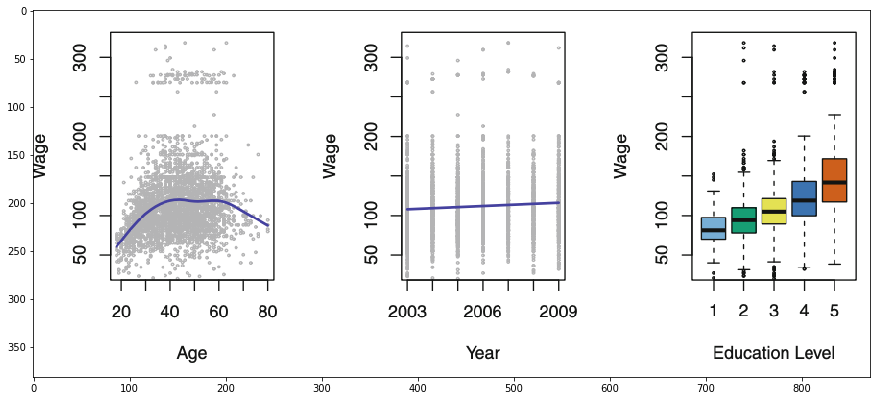

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(15, 8))
plt.imshow(mpimg.imread("./images/figure_1_1.png"))

図1.1。米国の大西洋中央部の男性の所得調査情報を含む賃金データ。  
左：年齢の関数としての賃金。平均して、賃金は年齢とともに約60歳まで増加し、その時点で賃金は低下し始めます。  
センター：年の関数としての賃金。  
2003年から2009年の平均賃金はゆっくりと着実に約10,000ドル増加しています。  
右：教育の関数として賃金を表示するボックスプロット。大学院の学位）。平均して、賃金は教育のレベルに応じて増加します。  

従業員の年齢を考えると、この曲線を使用して彼の賃金を予測できます。  
ただし、図1.1からも明らかなように、この平均値にはかなりのばらつきがあり、年齢だけで特定の男性の賃金を正確に予測することはできません。  

また、各従業員の教育レベルと賃金が支払われた年についての情報もあります。  
図1.1の中央と右側のパネルは、年と教育の両方の関数として賃金を表示していますが、これらの両方の要因が賃金に関連していることを示しています。  
2003年から2009年の間に、賃金はおおよそ線形（または直線）の方法で約10,000ドル増加しますが、この上昇はデータの変動性に比べてごくわずかです。  
賃金は通常、高等教育レベルの個人の場合も高くなります。  
最低教育レベル（1）の男性は、最高教育レベル（5）の男性よりも実質的に低い賃金を持つ傾向があります。  
明らかに、特定の男性の賃金の最も正確な予測は、彼の年齢、教育、および年を組み合わせることによって得られます。  
第3章では、このデータセットから賃金を予測するために使用できる線形回帰について説明します。  
理想的には、賃金と年齢の非線形関係を考慮した方法で賃金を予測する必要があります。  
第7章では、この問題に対処するためのクラスのアプローチについて説明します。

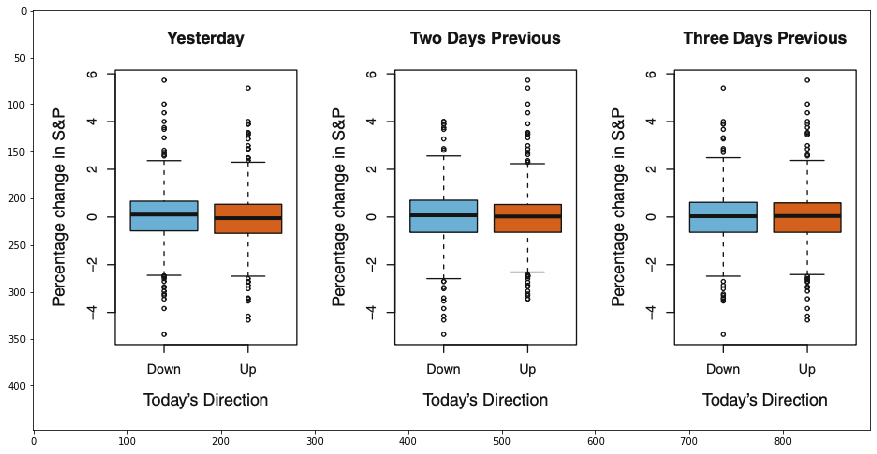

In [6]:
plt.figure(figsize=(15, 8))
plt.imshow(mpimg.imread("./images/figure_1_2.png"))

図1.2。左：Smarketデータから取得した、市場が増加または減少した日のS＆Pインデックスにおける前日のパーセンテージ変化の箱ひげ図。中央と右：左パネルと同じですが、2日前と3日前の変化率が表示されます。

### Stock Market Data

賃金データには、継続的または定量的な出力値の予測が含まれます。  
これはしばしば回帰問題と呼ばれます。  
ただし、場合によっては、代わりに、非数値、つまり、カテゴリまたは定性的な出力を予測したい場合があります。  
たとえば、第4章では、2001年から2005年までの5年間のスタンダード＆プアーズ500（S＆P）株価指数の毎日の動きを含む株式市場データセットを調べます。  
これをSマーケットデータと呼びます。  
目標は、インデックスの過去5日間の変化率を使用して、特定の日にインデックスが増加するか減少するかを予測することです。  
ここで、統計的学習問題は数値の予測を含みません。  
代わりに、特定の日の株式市場のパフォーマンスが上昇バケットまたは下降バケットに分類されるかどうかを予測することが含まれます。  
これは分類問題として知られています。  
市場が移動する方向を正確に予測できるモデルは非常に役立ちます。

図1.2の左側のパネルには、前日の株価指数の変化率の2つの箱ひげ図が表示されます。  
1つは翌日に市場が増加した648日間のもので、もう1つは市場が減少した602日間のものです。  
2つのプロットはほぼ同一に見え、S＆Pでの昨日の動きを使用して今日のリターンを予測する単純な戦略はないことを示唆しています。  
残りのパネルは、今日の2日前と3日前の変化率の箱ひげ図を表示しますが、同様に過去と現在の収益の関連性はほとんどありません。  
もちろん、このパターンの欠如は予想されます。  
連続する日のリターン間に強い相関関係が存在する場合、単純な取引戦略を採用して市場から利益を生み出すことができます。  
それにもかかわらず、第4章では、いくつかの異なる統計学習手法を使用してこれらのデータを探索します。  
興味深いことに、データにはいくつかの弱い傾向のヒントがあり、少なくともこの5年間で、市場の動きの方向を約60％の時間で正確に予測できることを示唆しています（図1.3）。

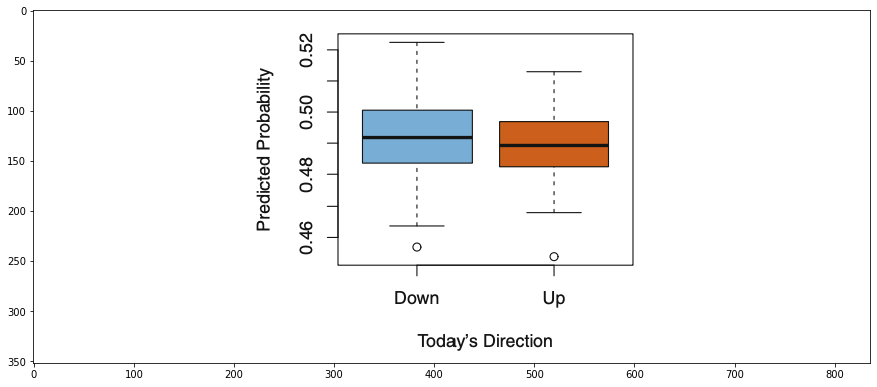

In [7]:
plt.figure(figsize=(15, 8))
plt.imshow(mpimg.imread("./images/figure_1_3.png"))

図1.3。二次判別分析モデルを2001〜2004年の期間に対応するSmarketデータのサブセットに適合させ、2005年のデータを使用して株式市場の減少の確率を予測しました。平均して、予測される減少の確率は、市場が減少する日ほど高くなります。これらの結果に基づいて、市場の動きの方向を60％の確率で正しく予測することができます。

### Gene Expression Data

前の2つのアプリケーションは、入力変数と出力変数の両方を持つデータセットを示しています。  
ただし、問題の別の重要なクラスには、対応する出力がない、入力変数のみを観察する状況が含まれます。  
たとえば、マーケティングの設定では、現在または潜在的な多数の顧客の人口統計情報がある場合があります。  
観察された特性に従って個人をグループ化することにより、どのタイプの顧客が互いに類似しているかを理解したい場合があります。  
これはクラスタリングの問題として知られています。  
前の例とは異なり、ここでは出力変数の予測を試みていません。  
 
第10章では、自然な出力変数が利用できない問題の統計的学習方法について説明します。  
NCI60データセットを検討します。  
これは、64の癌細胞株のそれぞれについて6,830の遺伝子発現測定から構成されます。  
特定の出力変数を予測するのではなく、遺伝子発現測定に基づいて、細胞株間にグループまたはクラスターがあるかどうかを判断することに関心があります。  
これは、細胞株ごとに何千もの遺伝子発現測定があり、データを視覚化することが困難になるため、対処するのが難しい質問です

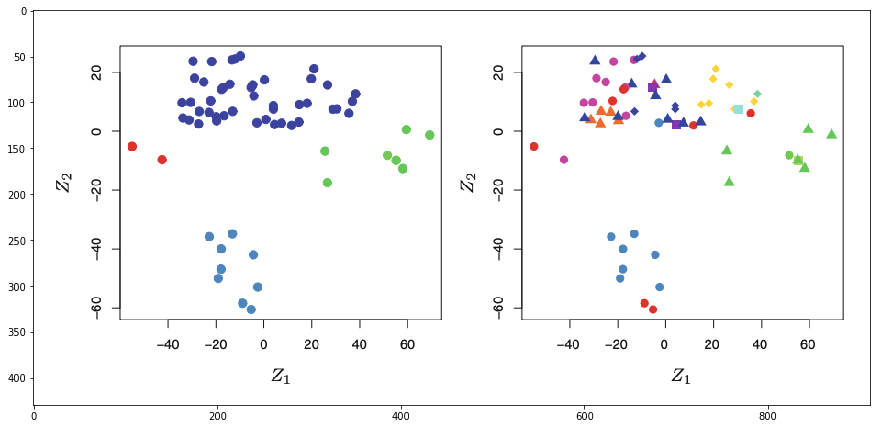

In [8]:
plt.figure(figsize=(15, 8))
plt.imshow(mpimg.imread("./images/figure_1_4.png"))

左：2次元空間Z1およびZ2でのNCI60遺伝子発現データセットの表現。各ポイントは、64の細胞株の1つに対応します。セルラインの4つのグループがあるように見えますが、これらは異なる色を使用して表しています。右：左のパネルと同じですが、14種類の癌のそれぞれを異なる色の記号で表しています。同じ種類のがんに対応する細胞株は、2次元空間で近くにある傾向があります。

図1.4の左側のパネルは、Z1とZ2の2つの数値のみを使用して64個の細胞株のそれぞれを表すことにより、この問題に対処しています。  
これらは、データの最初の2つの主要なコンポーネントであり、各細胞株の6,830の式の測定値を2つの数値または次元に要約します。  
この次元の削減により情報が失われた可能性がありますが、クラスタリングの証拠としてデータを視覚的に調べることが可能になりました。  
多くの場合、クラスターの数を決定することは難しい問題です。  
しかし、図1.4の左側のパネルは、少なくとも4つの細胞株のグループを示しています。  
これらは、別々の色を使用して表しています。遺伝子発現レベルとがんとの関係をよりよく理解するために、各クラスター内の細胞株のがんのタイプの類似性を調べることができます。  

この特定のデータセットでは、細胞株が14種類の癌に対応していることがわかります。  
（ただし、この情報は図1.4の左側のパネルの作成には使用されませんでした。）  
図1.4の右側のパネルは左側のパネルと同じですが、14種類のがんが異なる色の記号で示されています。  
この2次元表示では、同じ癌タイプの細胞株が互いに近くにある傾向があるという明確な証拠があります。  
さらに、左側のパネルを作成するために癌情報が使用されなかったとしても、得られたクラスタリングは、右側のパネルで観察された実際の癌タイプのいくつかにある程度類似しています。  
これにより、クラスタリング分析の精度を独立して検証できます。

## A Brief History of Statical Learning

統計学習という用語はかなり新しいものですが、この分野の根底にある概念の多くはずっと前に開発されました。  
19世紀の初めに、ルジャンドルとガウスは最小二乗法に関する論文を発表しました。これは現在線形回帰として知られている最も初期の形式を実装しています。  
このアプローチは、最初に天文学の問題にうまく適用されました。  
線形回帰は、個人の給与などの定量値を予測するために使用されます。  
患者が生存するか死亡するか、株式市場が増加するか減少するかなどの定性的な値を予測するために、フィッシャーは1936年に線形判別分析を提案しました。  
1940年代に、さまざまな著者が別のアプローチであるロジスティック回帰を発表しました。  
1970年代初頭、NelderとWedderburnは、特殊なケースとして線形回帰とロジスティック回帰の両方を含む統計学習手法のクラス全体に対して、一般化線形モデルという用語を作り出しました。  

1970年代の終わりまでに、データから学習するためのさらに多くの技術が利用可能になった。  
ただし、非線形関係をフィッティングすることは、当時は計算上実行不可能であったため、ほとんどが線形法でした。  
1980年代までに、コンピューティング技術はようやく十分に改善され、非線形法はもはや計算上禁止されなくなった。  
1980年代半ばに、ブライマン、フリードマン、オルシェン、ストーンは分類と回帰ツリーを導入し、モデル選択の相互検証を含む、メソッドの詳細な実用的な実装の威力を最初に実証しました。  
HastieとTibshiraniは、一般化線形モデルへの非線形拡張のクラスを表すために、一般化加法モデルという用語を1986年に作成し、実用的なソフトウェア実装も提供しました。  

それ以来、機械学習やその他の分野の出現に触発されて、統計学習は、監視ありおよび監視なしのモデリングと予測に焦点を当てた、統計の新しいサブフィールドとして浮上しています。  
近年、統計学習の進歩は、人気のある自由に利用できるRシステムなど、強力で比較的ユーザーフレンドリーなソフトウェアの利用可能性の増加によって特徴付けられています。  
これは、統計学者やコンピューター科学者が使用および開発した一連の手法から、より広範なコミュニティに不可欠なツールキットへと、フィールドの変換を継続する可能性があります。

### This Book

Elements of Statistical Learning（ESL）は、Hastie、Tibshirani、およびFriedmanによって2001年に最初に発行されました。  
それ以来、統計的機械学習の基礎に関する重要なリファレンスになっています。  
その成功は、統計学習における多くの重要なトピックの包括的かつ詳細な扱い、および（多くの上位レベルの統計の教科書と比較して）幅広い読者がアクセスできるという事実に由来しています。  
ただし、ESLの成功の背後にある最大の要因は、その局所的な性質です。  
その発表の時点で、統計学習の分野への関心が爆発的に高まり始めていました。  
ESLは、トピックに対する最初のアクセス可能で包括的な紹介の1つを提供しました  

ESLが最初に公開されて以来、統計学習の分野は繁栄し続けています。フィールドの拡大には2つの形態があります。  
最も明らかな成長には、多くの分野にわたるさまざまな科学的質問に答えることを目的とした、新しく改善された統計学習アプローチの開発が含まれています。  
ただし、統計学習の分野も対象者を拡大しています。  
1990年代には、計算能力の向上により、最先端の統計ツールを使用してデータを分析することを熱望していた非統計家から、この分野への関心が高まりました。  
残念ながら、これらのアプローチの高度な技術的性質により、ユーザーコミュニティは、統計、コンピュータサイエンス、およびそれらを理解して実装するためのトレーニング（および時間）を伴う関連分野の専門家に限定されたままでした。  

近年、新しく改善されたソフトウェアパッケージにより、多くの統計学習方法の実装負担が大幅に軽減されました。  
同時に、ビジネスからヘルスケア、遺伝学、社会科学など、多くの分野にわたって統計学習は重要な実用的なアプリケーションを備えた強力なツールであるという認識が高まっています。  
その結果、この分野は、主に学問的な興味の1つから、主流の分野に移行しました。  
この傾向は、膨大な量のデータとそれを分析するためのソフトウェアの利用可能性の増加とともに確実に継続します。  

統計学習の紹介（ISL）の目的は、統計学習の学問分野から主流分野への移行を促進することです。 
ISLはESLを置き換えることを意図していません。  
ESLは、検討されるアプローチの数とそれらが探求される深さの両方の点ではるかに包括的なテキストです。  
ESLは、統計学習アプローチの背後にある技術的な詳細を理解する必要がある専門家（統計学、機械学習、または関連分野の大学院の学位を持つ）にとって重要な仲間であると考えています。  
ただし、統計的学習手法のユーザーのコミュニティは、より広い範囲の興味と背景を持つ個人を含むように拡大しています。  
したがって、今では技術的でなく、よりアクセスしやすいバージョンのESLを使用できる場所があると考えています。  

長年にわたってこれらのトピックを教えることで、経営学、生物学、コンピュータサイエンスなどの異なる分野の修士課程と博士課程の学生だけでなく、量的志向の学部の大学生にも関心があることがわかりました。  
この多様なグループが、さまざまなアプローチのモデル、直感、および長所と短所を理解できることが重要です。  
しかし、この読者にとって、最適化アルゴリズムや理論的特性など、統計学習法の背後にある技術的な詳細の多くは、主な関心事ではありません。  
私たちは、これらの学生は、さまざまな方法論について知識のあるユーザーになるため、および統計学習ツールの使用を通じて選択した分野に貢献するために、これらの側面を深く理解する必要はないと考えています  

ISLRは、次の4つの前提に基づいています。  

1.多くの統計学習方法は、統計科学だけでなく、幅広い学問分野および非学問分野で関連性があり有用です。  
現在の多くの統計的学習手順は、線形回帰などの従来の方法の場合と同じように広く利用可能であり、今後も使用されるようになるはずです。  
その結果、考えられるすべてのアプローチ（不可能な作業）を検討するのではなく、最も広く適用できると考える方法の提示に集中しました。  

2.統計的学習を一連のブラックボックスと見なすべきではありません。  
すべての可能なアプリケーションで単一のアプローチがうまく機能することはありません。  
ボックス内のすべての歯車、またはそれらの歯車間の相互作用を理解しないと、最適なボックスを選択することは不可能です。  
したがって、私たちは、検討する各方法の背後にあるモデル、直感、仮定、およびトレードオフを注意深く説明することを試みました。  

3.各コグが実行するジョブを知ることは重要ですが、マシンをボックス内に構築するスキルは必要ありません。  
したがって、フィッティング手順と理論的特性に関連する技術的な詳細についての議論は最小限に抑えられています。  
私たちは読者が基本的な数学的概念に慣れていると仮定しますが、数理科学の大学院の学位を仮定していません。  
たとえば、行列代数の使用をほぼ完全に回避しており、行列とベクトルの詳細な知識がなくても本全体を理解することができます。  

4.読者が統計的学習法を現実世界の問題に適用することに関心を持っていると想定します。  
これを容易にするため、および説明した手法を動機付けるために、各章内のセクションをRコンピュータラボに割り当てました。  
各ラボでは、その章で検討した方法の実際的なアプリケーションについて読者に説明します。  
私たちのコースでこの教材を教えたとき、教室の時間の約3分の1をラボでの作業に割り当てており、非常に役立つことがわかりました。  
当初はRのコマンドレベルのインターフェースに怯えていた、あまりコンピュータ指向ではない学生の多くは、四半期または学期の途中で物事にこだわりました。  
Rは自由に利用でき、本で説明されているすべてのメソッドを実装するのに十分強力であるため、Rを使用しました。  
また、文字通り何千もの追加メソッドを実装するためにダウンロードできるオプションパッケージもあります。  
最も重要なのは、Rが学術統計学者にとって最適な言語であり、新しいアプローチが商用パッケージに実装される前のR年に利用可能になることが多いことです。  
ただし、ISLのラボは自己完結型であり、読者が別のソフトウェアパッケージを使用したい場合や、議論された方法を実際の問題に適用したくない場合はスキップできます。

### Who Should Read This Book?

この本は、データからのモデリングと予測に最新の統計的手法を使用することに関心がある人を対象としています。  
このグループには、科学者、エンジニア、データアナリスト、またはクオンツが含まれますが、社会科学やビジネスなどの非定量的分野の学位を持つ技術者は少なくなります。  
私たちは、読者が統計学の少なくとも1つの初級コースを持つことを期待しています。  
第3章で線形回帰の背後にある主要な概念を確認するため、線形回帰の背景も役立ちますが、必須ではありません。  
この本の数学的レベルは控えめで、行列演算の詳細な知識は必要ありません。  
この本は、統計プログラミング言語Rの概要を提供します。  
MATLABやPythonなどのプログラミング言語にこれまでに触れたことは役立ちますが、必須ではありません。  

私たちはこのレベルで、ビジネス、コンピュータサイエンス、生物学、地球科学、心理学、および物理社会科学のその他の多くの分野の修士および博士課程の学生に教材を教えることに成功しています。  
この本は、線形回帰に関するコースをすでに受講している上級の学部生にも適しています。  
ESLが主要な教科書として機能する、より数学的に厳密なコースのコンテキストでは、ISLは、さまざまなアプローチの計算の側面を教えるための補足テキストとして使用できます。

### Nation and Simple Matrix Algebra

教科書の表記を選択することは、常に難しい作業です。ほとんどの場合、ESLと同じ表記規則を採用しています。  

nを使用して、サンプル内の個別のデータポイントまたは観測値の数を表します。  
予測の作成に使用できる変数の数をpに示します。  
たとえば、賃金データセットは3,000人の12の変数で構成されているため、n = 3,000の観測値があり、この本では、変数名を色付きのフォントを使用して示しています。  
いくつかの例では、pは非常に大きくなる可能性があります。  
この状況は、たとえば、現代の生物学的データやWebベースの広告データの分析で頻繁に発生します。  
p = 12変数（年、年齢、性別など）。一般に、$x_{ij}$はi番目の観測値のj番目の変数の値を表すことに注意してください。  
ここで、i = 1、2、...、nおよびj = 1、2、...、pです。この本全体を通して、iはサンプルまたは観測値（1からnまで）のインデックス付けに使用され、jは変数（1からpまで）のインデックス付けに使用されます。 Xを、（i、j）番目の要素がxijであるn×p行列を表すとします。あれは、  

\begin{eqnarray}
  A = \left(
    \begin{array}{cccc}
      x_{11} & x_{12} & \ldots & x_{1n} \\
      x_{21} & x_{22} & \ldots & x_{2n} \\
      \vdots & \vdots & \ddots & \vdots \\
      x_{n1} & x_{n2} & \ldots & x_{np}
    \end{array}
  \right)
\end{eqnarray}  

行列に慣れていない読者には、Xをn行とp列の数値のスプレッドシートとして視覚化すると便利です。  
時々、Xの行に関心があり、x_1、x_2、...、x_nと記述します。ここでx_iは長さpのベクトルで、i番目の観測のp個の変数測定値を含みます。あれは、  

\begin{eqnarray}
  x_i = \left(
    \begin{array}{cccc}
      x_{i1} \\
      x_{i2} \\
      \vdots \\
      x_{ip}
    \end{array}
  \right) \;\;\; (1.1)
\end{eqnarray}  